In [33]:
import pandas as pd 
import numpy as np 
tt=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\6-FeatureEngineering\featured_all.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\5-Churns\submission_with_churns.csv')

In [35]:
tt['date']=pd.to_datetime(tt['date'])

In [36]:
tt['month']=tt['date'].dt.month
tt['year']=tt['date'].dt.year

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tt['merchant_id']=le.fit_transform(tt['merchant_id'])

In [38]:
tt

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
0,0,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,8,2021
1,0,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,10,2022
2,0,NaN,2023-10-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,10,2023
3,0,NaN,2023-11-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,11,2023
4,0,NaN,2023-12-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369317,26059,3.0,2023-02-01,True,799,0,6,3.0,3.0,3.0,3.0,NaN,NaN,2,2023
369318,26059,4.0,2023-06-01,True,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN,6,2023
369319,26059,NaN,2023-10-01,False,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN,10,2023
369320,26059,NaN,2023-11-01,False,799,0,6,NaN,NaN,NaN,NaN,NaN,NaN,11,2023


In [39]:
train=tt[tt['is_train']==1].reset_index(drop=True)
test=tt[tt['is_train']==0].reset_index(drop=True)

In [40]:
train

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
0,0,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,8,2021
1,0,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN,10,2022
2,1,6.0,2021-11-01,True,180,0,6,NaN,NaN,NaN,NaN,NaN,NaN,11,2021
3,1,24.0,2021-12-01,True,180,0,6,6.0,NaN,NaN,NaN,NaN,NaN,12,2021
4,1,15.0,2022-01-01,True,180,0,6,24.0,6.0,NaN,15.000000,NaN,NaN,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291137,26059,3.0,2022-11-01,True,799,0,6,8.0,NaN,NaN,NaN,NaN,NaN,11,2022
291138,26059,3.0,2022-12-01,True,799,0,6,3.0,8.0,NaN,4.666667,NaN,NaN,12,2022
291139,26059,3.0,2023-01-01,True,799,0,6,3.0,3.0,8.0,3.000000,NaN,NaN,1,2023
291140,26059,3.0,2023-02-01,True,799,0,6,3.0,3.0,3.0,3.000000,NaN,NaN,2,2023


# Only trained without churns

In [41]:
train=train.query("flag==1").reset_index(drop=True)

In [42]:
import pandas as pd



# Find the maximum date in your dataset
max_date = train['date'].max()

# Calculate the cutoff date (3 months before the max date)
cutoff_date = max_date - pd.DateOffset(months=3)

# Split the data into training and validation sets
train_data = train[train['date'] <= cutoff_date]
validation_data = train[train['date'] > cutoff_date]

# Now you have 'train_data' for training and 'validation_data' for validation


In [43]:
validation_data

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
9,2,3.0,2023-08-01,True,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,8,2023
10,2,4.0,2023-09-01,True,245,1,11,3.0,NaN,NaN,NaN,NaN,NaN,9,2023
15,7,3.0,2023-09-01,True,199,1,5,NaN,NaN,NaN,NaN,NaN,NaN,9,2023
16,11,3.0,2023-08-01,True,85,1,2,NaN,NaN,NaN,NaN,NaN,NaN,8,2023
17,11,3.0,2023-09-01,True,85,1,2,3.0,NaN,NaN,NaN,NaN,NaN,9,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156303,26055,5.0,2023-08-01,True,85,1,11,4.0,3.0,3.0,4.000000,3.833333,NaN,8,2023
156304,26055,5.0,2023-09-01,True,85,1,11,5.0,4.0,3.0,4.666667,3.833333,NaN,9,2023
156318,26058,15.0,2023-07-01,True,476,1,16,10.0,7.0,8.0,10.666667,10.833333,NaN,7,2023
156319,26058,9.0,2023-08-01,True,476,1,16,15.0,10.0,7.0,11.333333,10.833333,NaN,8,2023


In [44]:
train_data

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
0,2,3.0,2022-05-01,True,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,5,2022
1,2,4.0,2022-06-01,True,245,1,11,3.0,NaN,NaN,NaN,NaN,NaN,6,2022
2,2,10.0,2022-12-01,True,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,12,2022
3,2,6.0,2023-01-01,True,245,1,11,10.0,NaN,NaN,NaN,NaN,NaN,1,2023
4,2,4.0,2023-02-01,True,245,1,11,6.0,10.0,NaN,6.666667,NaN,NaN,2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156313,26058,9.0,2023-02-01,True,476,1,16,22.0,23.0,8.0,18.000000,NaN,NaN,2,2023
156314,26058,16.0,2023-03-01,True,476,1,16,9.0,22.0,23.0,15.666667,NaN,NaN,3,2023
156315,26058,8.0,2023-04-01,True,476,1,16,16.0,9.0,22.0,11.000000,14.333333,NaN,4,2023
156316,26058,7.0,2023-05-01,True,476,1,16,8.0,16.0,9.0,10.333333,14.166667,NaN,5,2023


In [45]:
X_train=train_data.drop(['date','net_payment_count','is_train','merchant_id'],axis=1)
y_train=train_data['net_payment_count']
X_val=validation_data.drop(['date','net_payment_count','is_train','merchant_id'],axis=1)
y_val=validation_data['net_payment_count']

In [46]:
X_train

,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
0,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,5,2022
1,245,1,11,3.0,NaN,NaN,NaN,NaN,NaN,6,2022
2,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,12,2022
3,245,1,11,10.0,NaN,NaN,NaN,NaN,NaN,1,2023
4,245,1,11,6.0,10.0,NaN,6.666667,NaN,NaN,2,2023
...,...,...,...,...,...,...,...,...,...,...,...
156313,476,1,16,22.0,23.0,8.0,18.000000,NaN,NaN,2,2023
156314,476,1,16,9.0,22.0,23.0,15.666667,NaN,NaN,3,2023
156315,476,1,16,16.0,9.0,22.0,11.000000,14.333333,NaN,4,2023
156316,476,1,16,8.0,16.0,9.0,10.333333,14.166667,NaN,5,2023


In [47]:
y_train

0          3.0
1          4.0
2         10.0
3          6.0
4          4.0
          ... 
156313     9.0
156314    16.0
156315     8.0
156316     7.0
156317    10.0
Name: net_payment_count, Length: 137399, dtype: float64

In [48]:
X_val

,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year
9,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,8,2023
10,245,1,11,3.0,NaN,NaN,NaN,NaN,NaN,9,2023
15,199,1,5,NaN,NaN,NaN,NaN,NaN,NaN,9,2023
16,85,1,2,NaN,NaN,NaN,NaN,NaN,NaN,8,2023
17,85,1,2,3.0,NaN,NaN,NaN,NaN,NaN,9,2023
...,...,...,...,...,...,...,...,...,...,...,...
156303,85,1,11,4.0,3.0,3.0,4.000000,3.833333,NaN,8,2023
156304,85,1,11,5.0,4.0,3.0,4.666667,3.833333,NaN,9,2023
156318,476,1,16,10.0,7.0,8.0,10.666667,10.833333,NaN,7,2023
156319,476,1,16,15.0,10.0,7.0,11.333333,10.833333,NaN,8,2023


In [49]:
y_val

9          3.0
10         4.0
15         3.0
16         3.0
17         3.0
          ... 
156303     5.0
156304     5.0
156318    15.0
156319     9.0
156320     4.0
Name: net_payment_count, Length: 18922, dtype: float64

In [50]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

model=xgb.XGBRegressor()

In [51]:
model.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric='mae')
preds=model.predict(X_val)

[0]	validation_0-mae:870.79986
[1]	validation_0-mae:677.91713
[2]	validation_0-mae:554.38841
[3]	validation_0-mae:457.02109
[4]	validation_0-mae:403.22562
[5]	validation_0-mae:356.12008
[6]	validation_0-mae:323.01219
[7]	validation_0-mae:307.84540
[8]	validation_0-mae:292.23856
[9]	validation_0-mae:285.98819
[10]	validation_0-mae:291.88090
[11]	validation_0-mae:288.23954
[12]	validation_0-mae:287.08954
[13]	validation_0-mae:284.70936
[14]	validation_0-mae:285.45196
[15]	validation_0-mae:282.80760
[16]	validation_0-mae:281.89773
[17]	validation_0-mae:280.37234
[18]	validation_0-mae:280.47869
[19]	validation_0-mae:281.05727
[20]	validation_0-mae:280.91438
[21]	validation_0-mae:280.60458
[22]	validation_0-mae:279.19693
[23]	validation_0-mae:277.70537
[24]	validation_0-mae:277.64715
[25]	validation_0-mae:281.94128
[26]	validation_0-mae:280.98211
[27]	validation_0-mae:281.38303
[28]	validation_0-mae:283.38815
[29]	validation_0-mae:275.13564
[30]	validation_0-mae:274.90984
[31]	validation_0-

c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mae:270.22636


[35]	validation_0-mae:270.15232
[36]	validation_0-mae:270.08012
[37]	validation_0-mae:270.23016
[38]	validation_0-mae:270.69397
[39]	validation_0-mae:270.94458
[40]	validation_0-mae:272.88513
[41]	validation_0-mae:272.95302
[42]	validation_0-mae:272.57510
[43]	validation_0-mae:270.64402
[44]	validation_0-mae:270.42874
[45]	validation_0-mae:270.66168
[46]	validation_0-mae:270.55502
[47]	validation_0-mae:270.84856
[48]	validation_0-mae:272.29176
[49]	validation_0-mae:271.75372
[50]	validation_0-mae:269.93216
[51]	validation_0-mae:267.81928
[52]	validation_0-mae:268.01666
[53]	validation_0-mae:266.35312
[54]	validation_0-mae:266.24914
[55]	validation_0-mae:266.38002
[56]	validation_0-mae:266.39813
[57]	validation_0-mae:265.96197
[58]	validation_0-mae:266.30420
[59]	validation_0-mae:266.57933
[60]	validation_0-mae:269.60460
[61]	validation_0-mae:269.66608
[62]	validation_0-mae:269.96609
[63]	validation_0-mae:269.45230
[64]	validation_0-mae:269.44501
[65]	validation_0-mae:269.34108
[66]	val

In [52]:
preds

array([26.070704 ,  7.1796875, 26.070704 , ...,  4.6034966,  9.127079 ,
        4.6034966], dtype=float32)

In [53]:
import pandas as pd

# Convert predictions to a DataFrame
preds_df = pd.DataFrame(preds, columns=['predicted'])

# Reset the index of X_val and y_val to allow for concatenation
X_val_reset = X_val.reset_index(drop=True)
y_val_reset = pd.DataFrame(y_val).reset_index(drop=True)

# Concatenate predictions and actual values with the validation set
validation_with_preds = pd.concat([X_val_reset, y_val_reset, preds_df], axis=1)


In [54]:
validation_with_preds

,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year,net_payment_count,predicted
0,245,1,11,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,3.0,26.070704
1,245,1,11,3.0,NaN,NaN,NaN,NaN,NaN,9,2023,4.0,7.179688
2,199,1,5,NaN,NaN,NaN,NaN,NaN,NaN,9,2023,3.0,26.070704
3,85,1,2,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,3.0,27.349035
4,85,1,2,3.0,NaN,NaN,NaN,NaN,NaN,9,2023,3.0,-0.079833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,85,1,11,4.0,3.0,3.0,4.000000,3.833333,NaN,8,2023,5.0,-2.656024
18918,85,1,11,5.0,4.0,3.0,4.666667,3.833333,NaN,9,2023,5.0,-2.656024
18919,476,1,16,10.0,7.0,8.0,10.666667,10.833333,NaN,7,2023,15.0,4.603497
18920,476,1,16,15.0,10.0,7.0,11.333333,10.833333,NaN,8,2023,9.0,9.127079


In [55]:
validation_with_preds['abs_perc_error'] = np.abs((validation_with_preds['predicted'] - validation_with_preds['net_payment_count']) / validation_with_preds['net_payment_count'])

# Find the maximum error

In [56]:
pd.options.display.max_rows=300

In [57]:
validation_with_preds.sort_values(by='abs_perc_error',ascending=False).head(100)

,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,month,year,net_payment_count,predicted,abs_perc_error
17087,101,1,19,23.0,71.0,150.0,31.333333,79.666667,60.000000,7,2023,0.0,18.912329,inf
4341,869,1,29,5.0,4.0,NaN,3.000000,NaN,NaN,9,2023,0.0,4.603497,inf
7355,1327,1,45,70.0,85.0,59.0,51.666667,60.333333,87.083333,9,2023,0.0,62.929890,inf
3327,1182,1,15,3.0,13.0,7.0,5.333333,5.666667,NaN,9,2023,0.0,9.622826,inf
13508,279,1,31,NaN,NaN,NaN,NaN,NaN,NaN,9,2023,0.0,26.070704,inf
10211,187,1,15,8.0,3.0,9.0,3.666667,5.666667,NaN,7,2023,0.0,4.603497,inf
10755,1185,1,14,20.0,5.0,3.0,8.333333,7.000000,NaN,8,2023,0.0,21.355459,inf
14993,343,1,6,4.0,4.0,3.0,2.666667,NaN,NaN,9,2023,0.0,4.603497,inf
1081,443,1,2,6.0,NaN,NaN,NaN,NaN,NaN,9,2023,0.0,7.179688,inf
5319,799,1,14,299.0,288.0,369.0,196.000000,223.833333,175.000000,9,2023,1.0,263.759277,262.759277


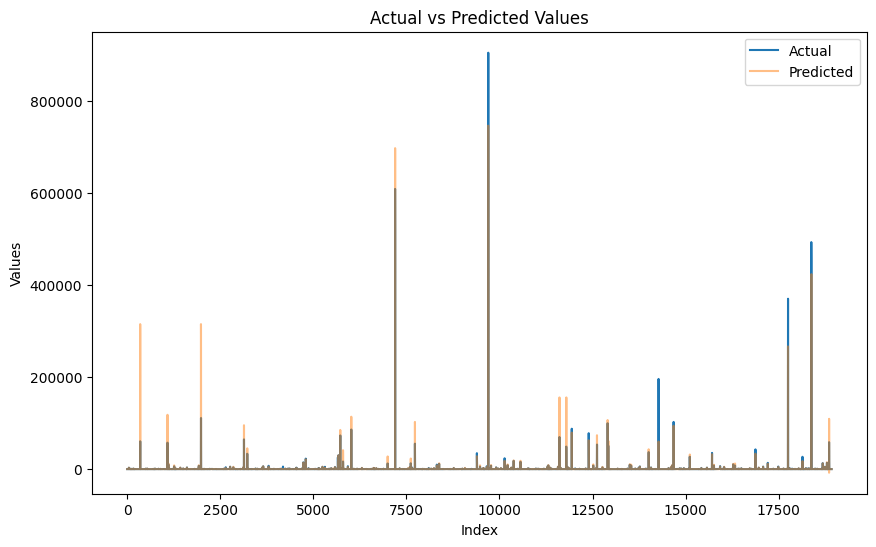

In [61]:
import matplotlib.pyplot as plt

# Assuming the actual values column in 'y_val_reset' is named 'actual'
plt.figure(figsize=(10, 6))
plt.plot(validation_with_preds['net_payment_count'], label='Actual', alpha=1)
plt.plot(validation_with_preds['predicted'], label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


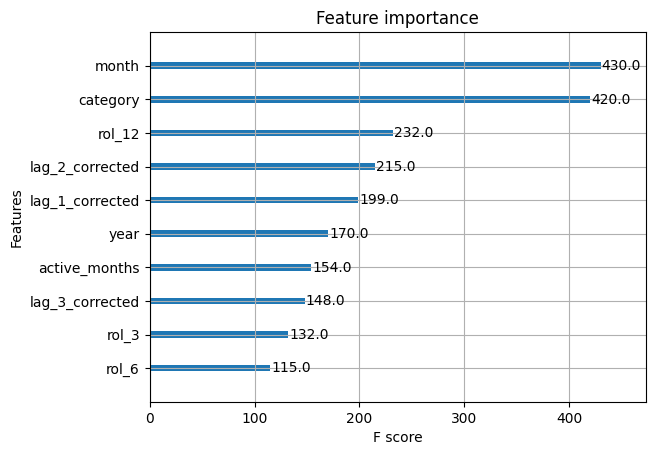

In [62]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

## Lgbm

## XGBoost

In [60]:
import xgboost as xgb

# With merchant_id